# Assignment 8: Data Aggregation and Group Operations

## Overview
This assignment covers data aggregation and group operations using healthcare/insurance EHR data. You'll analyze patient encounters (insurance claims), healthcare providers, and medical facilities across different regions. The data includes provider statistics, facility information, and encounter charges with insurance coverage details.

## Setup

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set random seed for reproducibility
np.random.seed(42)

# Create output directory
os.makedirs('output', exist_ok=True)

## Question 1: Basic GroupBy Operations

### Part 1.1: Load and Explore Data

**TODO: Load and merge the datasets**

In [41]:
# TODO: Load the three CSV files into dataframes
# provider_df = pd.read_csv(...)
provider_df = pd.read_csv('data/provider_data.csv')
# facility_df = pd.read_csv(...)
facility_df = pd.read_csv('data/facility_data.csv')
# encounter_df = pd.read_csv(...)
encounter_df = pd.read_csv('data/encounter_data.csv')

# TODO: Print the shapes of each dataframe
# print("Provider data shape:", ...)
print("Provider data shape:", provider_df.shape)
# print("Facility data shape:", ...)
print("Facility data shape:", facility_df.shape)
# print("Encounter data shape:", ...)
print("Encounter data shape:", encounter_df.shape)


# TODO: Merge the dataframes for analysis
# Hint: Start by merging encounter_df with provider_df on 'provider_id'
#       Then merge the result with facility_df on 'facility_id'
# Note: Both encounter_df and provider_df have 'facility_id', and both encounter_df and facility_df have 'region'
#       After merging, you may need to handle duplicate column names (pandas will add suffixes like _x and _y)
#       You can drop one of the duplicate columns and rename if needed

encounter_provider = pd.merge(encounter_df, provider_df, on = 'provider_id', how = 'left')
encounter_provider = encounter_provider.drop(columns = ['facility_id_y'])
encounter_provider = encounter_provider.rename(columns = {'facility_id_x': 'facility_id'})
display(encounter_provider.head(10))

encounter_provider_facility = pd.merge(encounter_provider, facility_df, on = 'facility_id', how = 'left')
encounter_provider_facility = encounter_provider_facility.drop(columns = ['region_y'])
encounter_provider_facility = encounter_provider_facility.rename(columns = {'region_x': 'region'})
display(encounter_provider_facility.head(10))


# TODO: Print the merged dataframe shape, columns, and first few rows
# print("\nMerged data shape:", ...)
print("Merged data shape:", encounter_provider_facility.shape)
# print("\nColumns:", ...)
print("Columns:", encounter_provider_facility.columns)
# print("\nFirst few rows:")
display("First few rows:",encounter_provider_facility.head())

# print(...)

Provider data shape: (500, 7)
Facility data shape: (10, 6)
Encounter data shape: (5000, 12)


,encounter_id,patient_id,provider_id,facility_id,encounter_date,encounter_type,diagnosis_code,procedure_code,service_charge,insurance_paid,patient_paid,region,provider_name,provider_type,specialty,years_experience,license_number
0,ENC00001,PAT01564,PR0259,FAC004,2023-08-21,Office Visit,M79.3,99213,345.03,290.33,54.70,West,Quinn Anderson,Nurse,Pediatrics,11,LIC000259
1,ENC00002,PAT00296,PR0258,FAC001,2023-09-11,Inpatient,N18.9,85025,550.48,482.51,67.97,South,Drew Martinez,Therapist,Endocrinology,19,LIC000258
2,ENC00003,PAT01381,PR0213,FAC001,2023-03-20,Lab,K21.9,80053,149.84,116.67,33.17,South,Jordan Anderson,Physician,Dermatology,3,LIC000213
3,ENC00004,PAT01131,PR0146,FAC004,2023-09-03,Outpatient Procedure,H52.9,70450,1468.48,1198.71,269.77,West,Taylor Rodriguez,Nurse Practitioner,Oncology,6,LIC000146
4,ENC00005,PAT01388,PR0354,FAC003,2023-06-14,Emergency,G43.9,99214,672.23,507.22,165.01,South,Drew Anderson,Physician Assistant,Endocrinology,36,LIC000354
5,ENC00006,PAT01849,PR0118,FAC004,2023-05-24,Inpatient,H52.9,99214,998.64,875.93,122.71,West,Cameron Smith,Therapist,General Practice,14,LIC000118
6,ENC00007,PAT00833,PR0193,FAC004,2023-05-05,Outpatient Procedure,M25.5,99213,117.91,93.64,24.27,West,Alex Garcia,Physician,Neurology,11,LIC000193
7,ENC00008,PAT01503,PR0475,FAC001,2023-02-06,Inpatient,M79.3,99214,708.72,572.10,136.62,South,Riley Miller,Physician,Neurology,23,LIC000475
8,ENC00009,PAT01510,PR0321,FAC004,2023-03-03,Outpatient Procedure,N18.9,85025,195.06,170.27,24.79,West,Morgan Davis,Physician,Radiology,6,LIC000321
9,ENC00010,PAT00557,PR0260,FAC010,2023-01-15,Inpatient,I10,93000,868.08,746.08,122.00,West,Jordan Williams,Physician Assistant,Oncology,2,LIC000260


,encounter_id,patient_id,provider_id,facility_id,encounter_date,encounter_type,diagnosis_code,procedure_code,service_charge,insurance_paid,...,region,provider_name,provider_type,specialty,years_experience,license_number,facility_name,facility_type,beds,established_date
0,ENC00001,PAT01564,PR0259,FAC004,2023-08-21,Office Visit,M79.3,99213,345.03,290.33,...,West,Quinn Anderson,Nurse,Pediatrics,11,LIC000259,Northside Urgent Care,Urgent Care,313,1994-10-04
1,ENC00002,PAT00296,PR0258,FAC001,2023-09-11,Inpatient,N18.9,85025,550.48,482.51,...,South,Drew Martinez,Therapist,Endocrinology,19,LIC000258,City General Hospital,Urgent Care,276,1999-11-27
2,ENC00003,PAT01381,PR0213,FAC001,2023-03-20,Lab,K21.9,80053,149.84,116.67,...,South,Jordan Anderson,Physician,Dermatology,3,LIC000213,City General Hospital,Urgent Care,276,1999-11-27
3,ENC00004,PAT01131,PR0146,FAC004,2023-09-03,Outpatient Procedure,H52.9,70450,1468.48,1198.71,...,West,Taylor Rodriguez,Nurse Practitioner,Oncology,6,LIC000146,Northside Urgent Care,Urgent Care,313,1994-10-04
4,ENC00005,PAT01388,PR0354,FAC003,2023-06-14,Emergency,G43.9,99214,672.23,507.22,...,South,Drew Anderson,Physician Assistant,Endocrinology,36,LIC000354,Regional Medical Center,Urgent Care,459,1982-05-10
5,ENC00006,PAT01849,PR0118,FAC004,2023-05-24,Inpatient,H52.9,99214,998.64,875.93,...,West,Cameron Smith,Therapist,General Practice,14,LIC000118,Northside Urgent Care,Urgent Care,313,1994-10-04
6,ENC00007,PAT00833,PR0193,FAC004,2023-05-05,Outpatient Procedure,M25.5,99213,117.91,93.64,...,West,Alex Garcia,Physician,Neurology,11,LIC000193,Northside Urgent Care,Urgent Care,313,1994-10-04
7,ENC00008,PAT01503,PR0475,FAC001,2023-02-06,Inpatient,M79.3,99214,708.72,572.10,...,South,Riley Miller,Physician,Neurology,23,LIC000475,City General Hospital,Urgent Care,276,1999-11-27
8,ENC00009,PAT01510,PR0321,FAC004,2023-03-03,Outpatient Procedure,N18.9,85025,195.06,170.27,...,West,Morgan Davis,Physician,Radiology,6,LIC000321,Northside Urgent Care,Urgent Care,313,1994-10-04
9,ENC00010,PAT00557,PR0260,FAC010,2023-01-15,Inpatient,I10,93000,868.08,746.08,...,West,Jordan Williams,Physician Assistant,Oncology,2,LIC000260,Surgical Specialty Center,Urgent Care,474,1997-02-25


Merged data shape: (5000, 21)
Columns: Index(['encounter_id', 'patient_id', 'provider_id', 'facility_id',
       'encounter_date', 'encounter_type', 'diagnosis_code', 'procedure_code',
       'service_charge', 'insurance_paid', 'patient_paid', 'region',
       'provider_name', 'provider_type', 'specialty', 'years_experience',
       'license_number', 'facility_name', 'facility_type', 'beds',
       'established_date'],
      dtype='object')


'First few rows:'

,encounter_id,patient_id,provider_id,facility_id,encounter_date,encounter_type,diagnosis_code,procedure_code,service_charge,insurance_paid,...,region,provider_name,provider_type,specialty,years_experience,license_number,facility_name,facility_type,beds,established_date
0,ENC00001,PAT01564,PR0259,FAC004,2023-08-21,Office Visit,M79.3,99213,345.03,290.33,...,West,Quinn Anderson,Nurse,Pediatrics,11,LIC000259,Northside Urgent Care,Urgent Care,313,1994-10-04
1,ENC00002,PAT00296,PR0258,FAC001,2023-09-11,Inpatient,N18.9,85025,550.48,482.51,...,South,Drew Martinez,Therapist,Endocrinology,19,LIC000258,City General Hospital,Urgent Care,276,1999-11-27
2,ENC00003,PAT01381,PR0213,FAC001,2023-03-20,Lab,K21.9,80053,149.84,116.67,...,South,Jordan Anderson,Physician,Dermatology,3,LIC000213,City General Hospital,Urgent Care,276,1999-11-27
3,ENC00004,PAT01131,PR0146,FAC004,2023-09-03,Outpatient Procedure,H52.9,70450,1468.48,1198.71,...,West,Taylor Rodriguez,Nurse Practitioner,Oncology,6,LIC000146,Northside Urgent Care,Urgent Care,313,1994-10-04
4,ENC00005,PAT01388,PR0354,FAC003,2023-06-14,Emergency,G43.9,99214,672.23,507.22,...,South,Drew Anderson,Physician Assistant,Endocrinology,36,LIC000354,Regional Medical Center,Urgent Care,459,1982-05-10


### Part 1.2: Basic Aggregation

**TODO: Perform basic groupby operations**

In [42]:
# TODO: Group by facility (healthcare facility) and calculate basic stats
# TODO: Calculate mean, sum, count for years_experience by facility

print("Calculate mean, sum, count for years_experience by facility:")
print(encounter_provider_facility.groupby('facility_name').agg({
    'years_experience': ['mean', 'sum', 'count']
}))

# TODO: Calculate total encounter charges by facility
print("Calculate total encounter charges by facility")
print(encounter_provider_facility.groupby('facility_name')['service_charge'].sum())

# TODO: Calculate total insurance payments by facility
print("Calculate total insurance payments by facility")
print(encounter_provider_facility.groupby('facility_name')['insurance_paid'].sum())

# TODO: Find the facility with highest total encounter charges
print("Facility with highest total encounter charges")
total_encounter_charges = encounter_provider_facility.groupby('facility_name')['service_charge'].sum()
max_facility = total_encounter_charges.idxmax()
print(max_facility)

# TODO: Create a summary dataframe with one row per facility showing:
#       facility_name, total_providers, avg_years_experience, total_service_charge, total_insurance_paid

summary = encounter_provider_facility.groupby('facility_name').agg(
    total_providers = ('provider_id', 'nunique'), 
    avg_years_experience = ('years_experience', 'mean'),
    total_service_charge = ('service_charge', 'sum'),
    total_insurance_paid = ('insurance_paid', 'sum')

).reset_index()

display(summary)


# TODO: Save the summary dataframe as 'output/q1_groupby_analysis.csv'
summary.to_csv('output/q1_groupby_analysis.csv')

Calculate mean, sum, count for years_experience by facility:
                            years_experience             
                                        mean    sum count
facility_name                                            
Cardiology Specialty Center        19.319728   8520   441
City General Hospital              19.563008   9625   492
Community Health Clinic            20.160784  10282   510
Emergency Medical Center           19.668687   9736   495
Northside Urgent Care              20.137014   9847   489
Oncology Treatment Center          19.381139   9865   509
Pediatric Care Center              19.811676  10520   531
Primary Care Clinic                20.102970  10152   505
Regional Medical Center            20.209205   9660   478
Surgical Specialty Center          20.778182  11428   550
Calculate total encounter charges by facility
facility_name
Cardiology Specialty Center    276658.83
City General Hospital          295508.13
Community Health Clinic        334992.21
Em

,facility_name,total_providers,avg_years_experience,total_service_charge,total_insurance_paid
0,Cardiology Specialty Center,297,19.319728,276658.83,222139.04
1,City General Hospital,312,19.563008,295508.13,236798.50
2,Community Health Clinic,328,20.160784,334992.21,269207.92
3,Emergency Medical Center,299,19.668687,310735.25,248439.20
4,Northside Urgent Care,305,20.137014,297283.06,236839.71
5,Oncology Treatment Center,324,19.381139,334927.30,267183.95
6,Pediatric Care Center,326,19.811676,361811.04,291790.95
7,Primary Care Clinic,316,20.102970,323315.71,260297.44
8,Regional Medical Center,309,20.209205,316284.98,251750.43
9,Surgical Specialty Center,340,20.778182,349909.18,278503.38


### Part 1.3: Transform Operations

**TODO: Use transform operations to add group statistics**

In [49]:
# TODO: Add facility mean years_experience as new column
encounter_provider_facility['years_experience_mean'] = encounter_provider_facility.groupby('facility_name')['years_experience'].transform('mean')
# TODO: Add facility standard deviation of years_experience
encounter_provider_facility['years_experience_std'] = encounter_provider_facility.groupby('facility_name')['years_experience'].transform('std')
# TODO: Create normalized years_experience (z-score within facility)
encounter_provider_facility['years_experience_normalized'] = encounter_provider_facility.groupby('facility_name')['years_experience'].transform(lambda x: (x - x.mean()) / x.std())
# TODO: Add facility total encounter charges as new column
encounter_provider_facility['total_encounter_charges'] = encounter_provider_facility.groupby('facility_name')['service_charge'].transform('sum')
# TODO: Display the enhanced dataframe
display(encounter_provider_facility)
# TODO: Save results as 'output/q1_aggregation_report.txt'
with open('output/q1_aggregation_report.txt', 'w') as f:
    f.write("Assignment 8 - Question 1: Aggregation Report\n\n")
    f.write(encounter_provider_facility.to_string(index = False))

print("Save output/q1_aggregation_report.txt")

,encounter_id,patient_id,provider_id,facility_id,encounter_date,encounter_type,diagnosis_code,procedure_code,service_charge,insurance_paid,...,years_experience,license_number,facility_name,facility_type,beds,established_date,years_experience_mean,years_experience_std,years_experience_normalized,total_encounter_charges
0,ENC00001,PAT01564,PR0259,FAC004,2023-08-21,Office Visit,M79.3,99213,345.03,290.33,...,11,LIC000259,Northside Urgent Care,Urgent Care,313,1994-10-04,20.137014,10.581439,-0.863495,297283.06
1,ENC00002,PAT00296,PR0258,FAC001,2023-09-11,Inpatient,N18.9,85025,550.48,482.51,...,19,LIC000258,City General Hospital,Urgent Care,276,1999-11-27,19.563008,10.702137,-0.052607,295508.13
2,ENC00003,PAT01381,PR0213,FAC001,2023-03-20,Lab,K21.9,80053,149.84,116.67,...,3,LIC000213,City General Hospital,Urgent Care,276,1999-11-27,19.563008,10.702137,-1.547636,295508.13
3,ENC00004,PAT01131,PR0146,FAC004,2023-09-03,Outpatient Procedure,H52.9,70450,1468.48,1198.71,...,6,LIC000146,Northside Urgent Care,Urgent Care,313,1994-10-04,20.137014,10.581439,-1.336020,297283.06
4,ENC00005,PAT01388,PR0354,FAC003,2023-06-14,Emergency,G43.9,99214,672.23,507.22,...,36,LIC000354,Regional Medical Center,Urgent Care,459,1982-05-10,20.209205,11.575935,1.364105,316284.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ENC04996,PAT01045,PR0065,FAC002,2023-05-27,Emergency,K21.9,70450,5064.91,3932.06,...,36,LIC000065,Community Health Clinic,Urgent Care,160,2023-03-31,20.160784,11.044011,1.434191,334992.21
4996,ENC04997,PAT00658,PR0204,FAC004,2023-09-26,Lab,M79.3,99214,191.82,150.07,...,15,LIC000204,Northside Urgent Care,Urgent Care,313,1994-10-04,20.137014,10.581439,-0.485474,297283.06
4997,ENC04998,PAT01902,PR0174,FAC006,2023-04-25,Emergency,J44.9,80053,347.27,267.46,...,15,LIC000174,Oncology Treatment Center,Hospital,252,1994-03-19,19.381139,10.872386,-0.402960,334927.30
4998,ENC04999,PAT00925,PR0083,FAC006,2023-01-09,Lab,M79.3,99213,157.93,111.65,...,24,LIC000083,Oncology Treatment Center,Hospital,252,1994-03-19,19.381139,10.872386,0.424825,334927.30


Save output/q1_aggregation_report.txt


## Question 2: Advanced GroupBy Operations

### Part 2.1: Filter Operations

**TODO: Use filter operations to remove groups**

In [44]:
# TODO: Filter facilities with more than 20 providers (sufficient staffing)
providers_filter = encounter_provider_facility.groupby('facility_name').filter(lambda x: x['provider_id'].nunique() > 20)
print("Facilities with more than 20 providers")
print(providers_filter)

# TODO: Filter facilities with average years_experience > 10 (experienced staff)
years_exp_filter = encounter_provider_facility.groupby('facility_name').filter(lambda x: x['years_experience'].mean() > 10)
print("Facilities with average years experience > 10")
print(years_exp_filter)

# TODO: Filter facilities with total encounter charges > 250000 (high volume)
total_encounter_charge_filter = encounter_provider_facility.groupby('facility_name').filter(lambda x: x['service_charge'].sum() > 250000)
print("Facilities with total encounter charges > 250000")
print(total_encounter_charge_filter)

# TODO: Create a summary of filtered results
filtered_results = encounter_provider_facility.groupby('facility_name').filter(
    lambda x: (x['provider_id'].nunique() > 20)
        and (x['years_experience'].mean() > 10)
        and (x['service_charge'].sum() > 250000)
)
summary_filtered = filtered_results.groupby('facility_name').agg(
    total_providers = ('provider_id', 'nunique'),
    total_encounter_charge = ('service_charge', 'sum'),
    avg_years_experience = ('years_experience', 'mean')

).reset_index()

# TODO: Save results as 'output/q2_filter_analysis.csv'
summary_filtered.to_csv('output/q2_filter_analysis.csv')

Facilities with more than 20 providers
     encounter_id patient_id provider_id facility_id encounter_date  \
0        ENC00001   PAT01564      PR0259      FAC004     2023-08-21   
1        ENC00002   PAT00296      PR0258      FAC001     2023-09-11   
2        ENC00003   PAT01381      PR0213      FAC001     2023-03-20   
3        ENC00004   PAT01131      PR0146      FAC004     2023-09-03   
4        ENC00005   PAT01388      PR0354      FAC003     2023-06-14   
...           ...        ...         ...         ...            ...   
4995     ENC04996   PAT01045      PR0065      FAC002     2023-05-27   
4996     ENC04997   PAT00658      PR0204      FAC004     2023-09-26   
4997     ENC04998   PAT01902      PR0174      FAC006     2023-04-25   
4998     ENC04999   PAT00925      PR0083      FAC006     2023-01-09   
4999     ENC05000   PAT00634      PR0466      FAC001     2023-12-12   

            encounter_type diagnosis_code  procedure_code  service_charge  \
0             Office Visit     

### Part 2.2: Apply Operations

**TODO: Use apply operations with custom functions**

In [46]:
# TODO: Create custom function to calculate provider statistics
def provider_stats(group):
    return pd.Series({
        'mean': group['years_experience'].mean(), 
        'std': group['years_experience'].std(),
        'max': group['years_experience'].max(), 
        'min': group['years_experience'].min(), 
        'range': group['years_experience'].max() - group['years_experience'].min()

    })

    # TODO: Return mean, std, min, max, range for years_experience
    

# TODO: Apply custom function to each facility
# Note: Add include_groups=False to avoid pandas FutureWarning about groupby columns
facility_provider_stats = encounter_provider_facility.groupby('facility_name').apply(provider_stats, include_groups=False)

# TODO: Create function to find top providers in each facility
def top_providers(group, n=2):
    """Return top n providers in a group by encounter volume"""
    provider_counts = (group.groupby(['provider_id', 'provider_name', 'years_experience', 'specialty'])
    .size()
    .reset_index(name = 'encounter_count'))
    top_n = provider_counts.sort_values(by = 'encounter_count', ascending = False).head(n)
    return top_n

    # TODO: Return top n rows by encounter count, selecting only provider_id, provider_name, 
    #       years_experience, specialty
    

# TODO: Apply function to get top 2 providers per facility
# IMPORTANT: When using groupby().apply(), the result has a MultiIndex where:
# - Level 0: The grouping column (facility_name)
# - Level 1: The original row index from each group
# Use reset_index(level=0) to move only the grouping column back to a regular column
# DO NOT use reset_index(drop=True) - that would drop ALL index levels including facility_name!
top_providers_by_facility = encounter_provider_facility.groupby('facility_name').apply(
    lambda x: top_providers(x, n=2)
).reset_index(level=0)  # Moves facility_name from index to column

# TODO: Save results as 'output/q2_performance_report.txt'
with open ('output/q2_performance_report.txt', 'w') as f:
    f.write("Assignment 8 - Question 2: Performance Report\n\n")
    f.write(top_providers_by_facility.to_string(index = False))

print("saved output/q2_performance_report.txt")




saved output/q2_performance_report.txt


/var/folders/1t/fdhld8652kzcc785qhfcqrqh0000gn/T/ipykernel_21349/4020827456.py:38: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_providers_by_facility = encounter_provider_facility.groupby('facility_name').apply(


### Part 2.3: Hierarchical Grouping

**TODO: Perform multi-level grouping**

In [38]:
# TODO: Group by facility type and region
# TODO: Calculate statistics for each facility_type-region combination
hierarchical_grouped = encounter_provider_facility.groupby(['facility_type', 'region']).agg(
    total_providers = ('provider_id', 'nunique'),
    total_encounter_charge = ('service_charge', 'sum'),
    avg_encounter_charge = ('service_charge', 'mean'),
    avg_years_experience = ('years_experience', 'mean')

)

# TODO: Use unstack to convert to wide format
wide_format = hierarchical_grouped.unstack()
print("Wide format")
print(wide_format)

# TODO: Use stack to convert back to long format
long_format = wide_format.stack()
print('Long format')
print(long_format)
# TODO: Analyze the hierarchical structure
hierarchical_summary = encounter_provider_facility.groupby(['facility_type', 'region']).agg(
    total_providers = ('provider_id', 'nunique'),
    total_encounter_charge = ('service_charge', 'sum'),
    avg_encounter_charge = ('service_charge', 'mean'),
    avg_years_experience = ('years_experience', 'mean')
).reset_index()

# TODO: Save results as 'output/q2_hierarchical_analysis.csv'
hierarchical_summary.to_csv('output/q2_hierarchical_analysis.csv')

Wide format
                 total_providers               total_encounter_charge  \
region                     North  South   West                  North   
facility_type                                                           
Hospital                     NaN  324.0    NaN                    NaN   
Specialty Center             NaN  424.0  427.0                    NaN   
Urgent Care                328.0  430.0  444.0              334992.21   

                                       avg_encounter_charge              \
region                South       West                North       South   
facility_type                                                             
Hospital          334927.30        NaN                  NaN  658.010413   
Specialty Center  672546.29  599974.54                  NaN  655.503207   
Urgent Care       611793.11  647192.24           656.847471  630.714546   

                             avg_years_experience                        
region                  

/var/folders/1t/fdhld8652kzcc785qhfcqrqh0000gn/T/ipykernel_21349/2129763854.py:17: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  long_format = wide_format.stack()


## Question 3: Pivot Tables and Cross-Tabulations

### Part 3.1: Basic Pivot Tables

**TODO: Create pivot tables for multi-dimensional analysis**

In [54]:
# TODO: Create pivot table: encounter charges by procedure code and region
pivot = pd.pivot_table(encounter_provider_facility, 
                       values = 'service_charge',
                       index = 'procedure_code', 
                       columns = 'region',
                       aggfunc = 'sum')

print("Encounter charges by procedure code and region")
print(pivot)

# TODO: Create pivot table with multiple aggregations (sum, mean, count)
pivot_multi = pd.pivot_table(encounter_provider_facility,
                             values = 'service_charge',
                             index = 'procedure_code',
                             columns = 'region',
                             aggfunc = ['sum', 'mean', 'count'])
print("Pivot table with multiple aggregations")
print(pivot_multi)
# TODO: Add totals (margins) to pivot table
# TODO: Handle missing values with fill_value
advanced_pivot = pd.pivot_table(encounter_provider_facility, 
                                values = 'service_charge', 
                                index = 'procedure_code',
                                columns = 'region',
                                aggfunc = ['sum', 'mean', 'count'],
                                margins = True,
                                margins_name = 'Total',
                                fill_value = 0)
print("Advanced pivot with totals and handles missing values")
print(advanced_pivot)

# Tip: When saving a pivot table to CSV, the index (row labels) is preserved by default.
#      This is usually desired - when reading back, use index_col=0 to restore the index.
# TODO: Save results as 'output/q3_pivot_analysis.csv'

advanced_pivot_columns = [f"{agg}_{region}" for agg, region in advanced_pivot.columns]
advanced_pivot.to_csv('output/q3_pivot_analysis.csv', index=True)

Encounter charges by procedure code and region
region             North      South       West
procedure_code                                
36415           12130.35   57836.97   48458.05
70450           90236.85  375893.20  312204.53
70551           52844.83  234817.26  160891.32
72040           11463.33   81039.58   56599.39
80053           14798.09   83849.78   58540.39
85025            8946.57   48989.64   40769.13
93000            6743.28   55873.35   45845.38
99213           62143.42  327262.66  259242.79
99214           71684.08  322532.05  240095.41
99283            4001.41   31172.21   24520.39
Pivot table with multiple aggregations
                     sum                               mean               \
region             North      South       West        North        South   
procedure_code                                                             
36415           12130.35   57836.97   48458.05   466.551923   416.093309   
70450           90236.85  375893.20  312204.53

In [51]:
print(encounter_provider_facility['service_charge'].dtype)

float64


### Part 3.2: Cross-Tabulations

**TODO: Create cross-tabulations for categorical analysis**

In [ ]:
# TODO: Create crosstab of facility type vs region with counts
# TODO: Create crosstab with margins (row and column totals)
crosstab = pd.crosstab(encounter_provider_facility['facility_type'],
                       encounter_provider_facility['region'],
                       margins = True)
print("Crosstab of facility type vs region with margins")
display(crosstab)

# TODO: Create multi-dimensional crosstab showing facility type × encounter type × region combinations
#       (Hint: use pd.crosstab with multiple index/column parameters, or create manually from the data)
multi_crosstab = pd.crosstab(
    index =[encounter_provider_facility['facility_type'], encounter_provider_facility['encounter_type']],
    columns = encounter_provider_facility['region'],
    margins = True
)
print("Multi-dimensional crosstab")
display(multi_crosstab)

# TODO: Analyze the cross-tabulation results
crosstab_no_totals = multi_crosstab.drop(index = 'All', errors = 'ignore').drop(columns = 'All', errors = 'ignore')
long_format = crosstab_no_totals.reset_index().melt(
    id_vars = ['facility_type', 'encounter_type'],
    var_name = 'region',
    value_name = 'count'
)
long_format['row_total'] = long_format.groupby(['facility_type', 'encounter_type'])['count'].transform('sum')
long_format['percentages_of_row'] = (long_format['count'] / long_format['row_total'] * 100).round(2)

long_format_sort = long_format.sort_values(by = 'count', ascending = False)
display(long_format_sort)

# TODO: Save results as 'output/q3_crosstab_analysis.csv'
long_format_sort.to_csv('output/q3_crosstab_analysis.csv')

  


Crosstab of facility type vs region with margins


region,North,South,West,All
facility_type,,,,
Hospital,0,509,0,509
Specialty Center,0,1026,946,1972
Urgent Care,510,970,1039,2519
All,510,2505,1985,5000


Multi-dimensional crosstab


region                                 North  South  West   All
facility_type    encounter_type                                
Hospital         Emergency                 0    127     0   127
                 Inpatient                 0     95     0    95
                 Lab                       0    100     0   100
                 Office Visit              0     85     0    85
                 Outpatient Procedure      0    102     0   102
Specialty Center Emergency                 0    236   182   418
                 Inpatient                 0    210   191   401
                 Lab                       0    211   180   391
                 Office Visit              0    175   200   375
                 Outpatient Procedure      0    194   193   387
Urgent Care      Emergency               109    190   195   494
                 Inpatient                90    190   201   481
                 Lab                      90    229   228   547
                 Office Visit            112    178   200   490
                 Outpatient Procedure    109    183   215   507
All                                      510   2505  1985  5000

/var/folders/1t/fdhld8652kzcc785qhfcqrqh0000gn/T/ipykernel_21349/2582776610.py:20: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  crosstab_no_totals = multi_crosstab.drop(index = 'All', errors = 'ignore').drop(columns = 'All', errors = 'ignore')


,facility_type,encounter_type,region,count,row_total,percentages_of_row
20,Specialty Center,Emergency,South,236,418,56.46
27,Urgent Care,Lab,South,229,547,41.86
42,Urgent Care,Lab,West,228,547,41.68
44,Urgent Care,Outpatient Procedure,West,215,507,42.41
22,Specialty Center,Lab,South,211,391,53.96
21,Specialty Center,Inpatient,South,210,401,52.37
41,Urgent Care,Inpatient,West,201,481,41.79
38,Specialty Center,Office Visit,West,200,375,53.33
43,Urgent Care,Office Visit,West,200,490,40.82
40,Urgent Care,Emergency,West,195,494,39.47


### Part 3.3: Pivot Table Visualization

**TODO: Create visualizations from pivot tables**

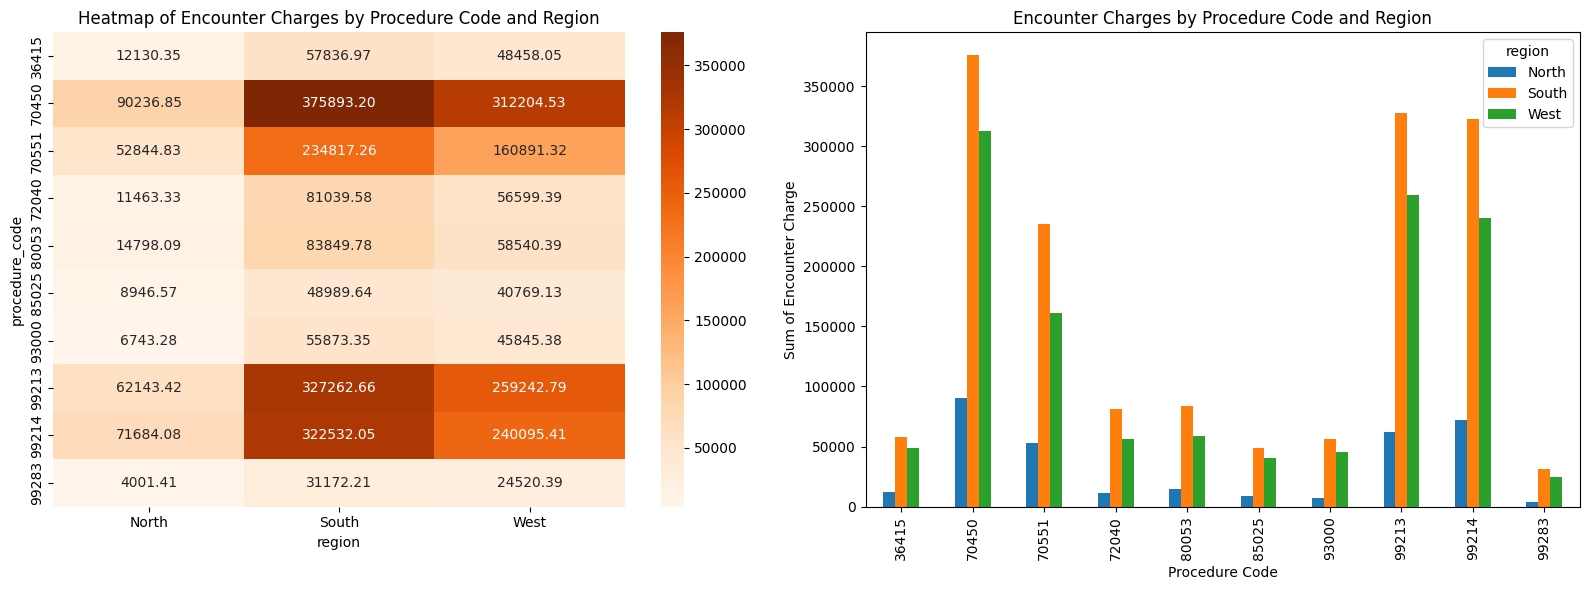

In [35]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))
# TODO: Create heatmap from pivot table
sns.heatmap(pivot, cmap = 'Oranges', annot = True, fmt = '.2f', ax = ax[0])
ax[0].set_title('Heatmap of Encounter Charges by Procedure Code and Region')

# TODO: Create bar chart from pivot table
pivot.plot(ax = ax[1],kind = 'bar', title = 'Encounter Charges by Procedure Code and Region', xlabel = 'Procedure Code', ylabel = 'Sum of Encounter Charge')

# TODO: Customize colors and styling
# TODO: Add appropriate titles and labels

# TODO: Save the plot as 'output/q3_pivot_visualization.png'
plt.tight_layout()
plt.savefig('output/q3_pivot_visualization.png', dpi = 300, bbox_inches = 'tight')
plt.show()

## Submission Checklist

Before submitting, verify you've created:

- [ ] `output/q1_groupby_analysis.csv` - Basic groupby analysis
- [ ] `output/q1_aggregation_report.txt` - Aggregation report
- [ ] `output/q2_filter_analysis.csv` - Filter operations analysis
- [ ] `output/q2_hierarchical_analysis.csv` - Hierarchical analysis
- [ ] `output/q2_performance_report.txt` - Performance report
- [ ] `output/q3_pivot_analysis.csv` - Pivot table analysis
- [ ] `output/q3_crosstab_analysis.csv` - Cross-tabulation analysis
- [ ] `output/q3_pivot_visualization.png` - Pivot visualization

## Key Learning Objectives

- Master the split-apply-combine paradigm
- Apply aggregation functions and transformations
- Create pivot tables for multi-dimensional analysis
- Apply advanced groupby techniques